In [1]:
# Our target here will be to create a fat matrix, where y will be only dependent on the few features and rest will be noise.
# Then we will use L-1 regularization to find the sparse set of weights that identifies the useful dimension of x.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
# Creating a fat matrix
N = 50
D = 50

X = (np.random.random((N, D)) - 0.5)*10  # X is a random uniform distribution between -5 and +5

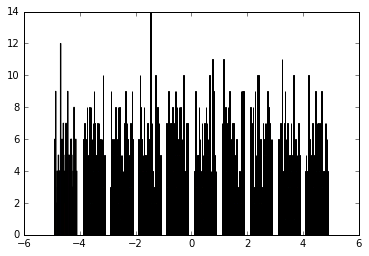

In [18]:
plt.hist(X, bins = 10)
plt.show()

In [19]:
true_w = np.array([1, 0.5, -0.5] + [0]*(D-3))  # so, 1st three dimensions actually influence the outputs and the rest are 0

In [21]:
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))
Y[0:10]

array([ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.])

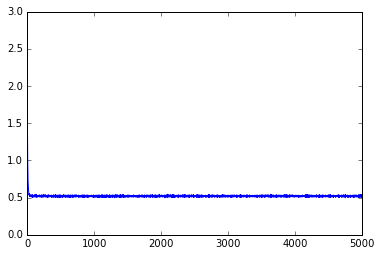

In [28]:
# Perform Gradient descent-
costs = []
w = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
l1 = 10.0 # l-1 penalty

for t in range(5000):
    Yhat = sigmoid(X.dot(w))
    w = w - learning_rate*(X.T.dot(Yhat - Y) + l1*np.sign(w))  # gradient is the l-1 regularization
    
    cost = -(Y*np.log(Yhat) + (1 - Y)*np.log(1 - Yhat)).mean() + l1*np.abs(w).mean()  # cost function of the l-1 reg
    costs.append(cost)
    
plt.plot(costs)
plt.show()

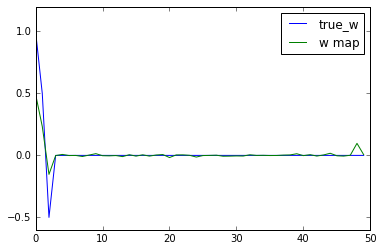

In [29]:
# Now let's plot true_w vs w
plt.plot(true_w, label = 'true_w')
plt.plot(w, label = 'w map')
plt.legend()
plt.show()

In [ ]:
# so, task would be to create a grid of l1 penalty and see at what point the cost is minimized.
# SO, for a given l1 pernalty run the 5000 epochs of Gradient descent and then change the value of l1 and run the same
# pick the value of l1 which has the lowest cost